<a href="https://colab.research.google.com/github/edisonc57/exercises/blob/main/Dranchuk_and_Abou_Kassem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

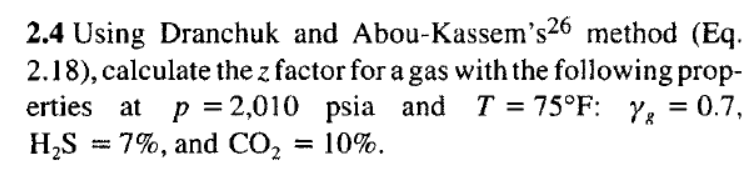

In [2]:
Давление= 2010
темп= 75 + 459.67
пг=0.7
h2s=0.07
co2=0.1


In [3]:
#расчет псевдокритических свойств
P_pc= 756.8 - 131.07*пг -3.6*пг**2
T_pc= 169.2 + 349.5*пг - 74*пг**2

In [4]:
#рассчитать поправку на псевдокритические свойства
e= (120 * (((h2s + co2)**0.9) - ((h2s + co2)**1.6))) + (15 * (h2s**0.5 - h2s**4))
T_pc_п= T_pc - e
P_pc_п= (P_pc * T_pc_п / (T_pc - h2s * e * (1-h2s)))

In [5]:
#псевдоприведенные свойства
T_pr= темп/T_pc_п
P_pr= Давление/P_pc_п

print(T_pr, P_pr)

1.5005661019949397 3.1995450990234966


In [13]:
from scipy.optimize import fsolve
import numpy as np

In [16]:

a1 = 0.3265; a2 = -1.0700; a3 = -0.5339; a4 = 0.01569; a5 = -0.05165; a6 = 0.5475
a7 = -0.7361; a8 = 0.1844; a9 = 0.1056; a10 = 0.6134; a11 = 0.7210

def f(y):
    опг, z = y
    L1 = a1 + (a2/T_pr) + (a3/(T_pr**3))+ (a4/(T_pr**4))+ (a5/(T_pr**5))
    L2 = a6 + (a7/T_pr) + (a8/(T_pr**2))
    L3 = a9*((a7/T_pr) + (a8/(T_pr**2)))
    L4 = (a10)*(1+(a11*(опг**2)))*((опг**2)/(T_pr**3))*(np.exp(-a11*(опг**2)))

    f1 = z + (L3*(опг**5)) - (L2*(опг**2)) - (L1*(опг**1)) - L4 - 1
    f2 = опг - ((0.27 * P_pr) / (z * T_pr))
    return[f1, f2]

solve = fsolve(f, [1, 1])

print("плотность газа и Z фактор :", solve )







плотность газа и Z фактор : [0.74469116 0.7730733 ]
